<a href="https://colab.research.google.com/github/Salipa-Gurung/Git-Prac/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

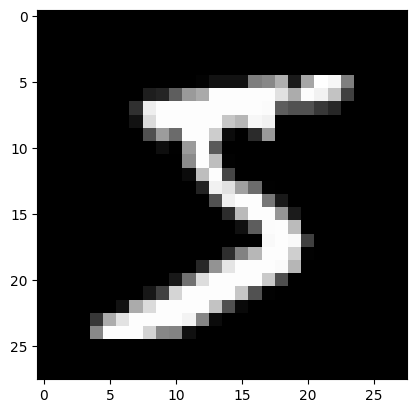

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0],28*28))

In [7]:
x_train.shape

(60000, 784)

In [8]:
from sklearn.linear_model import LogisticRegression

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

In [14]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("logistic regression accuracy:",accuracy_logreg)

logistic regression accuracy: 0.9255


In [18]:
from sklearn.svm import SVC

In [19]:
svc = SVC(max_iter=100)
svc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=100)

In [20]:
y_pred_svc = svc.predict(x_test)

In [21]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)

In [22]:
print("SVC Accuracy: ",accuracy_svc)

SVC Accuracy:  0.9271


In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

In [32]:
cm_svc

array([[ 972,    0,    1,    0,    0,    1,    2,    1,    3,    0],
       [   0, 1120,    2,    1,    0,    0,    1,    0,   10,    1],
       [   8,    2,  981,   13,    1,    0,    2,   15,    9,    1],
       [   0,    0,   10,  935,    1,   18,    0,    4,   22,   20],
       [   1,    0,    2,    0,  850,    0,    6,    2,    1,  120],
       [   7,    1,    3,   24,    2,  820,    9,    1,   20,    5],
       [   7,    2,    2,    0,    1,    3,  938,    0,    5,    0],
       [   1,    6,    5,   10,    3,    0,    0,  819,    0,  184],
       [   5,    1,   19,   12,    0,    2,    2,    4,  914,   15],
       [   8,    3,    4,    7,   47,    2,    0,    7,    9,  922]])

<Axes: >

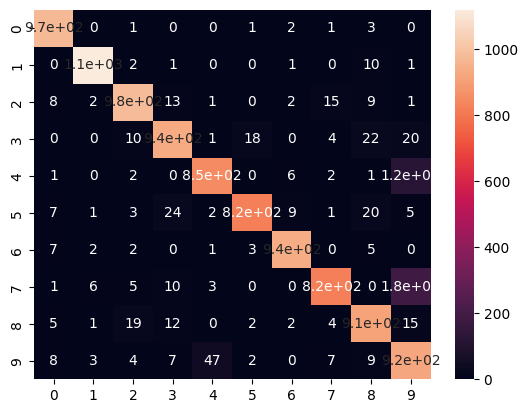

In [33]:
import seaborn as sns
sns.heatmap(cm_svc, annot=True)

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax', ))

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    x_train,
    y_train,
    epochs=2,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/2
1875/1875 [==============================] - 13s 6ms/step - loss: 1.7499 - accuracy: 0.8644 - val_loss: 0.3922 - val_accuracy: 0.9037
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2886 - accuracy: 0.9287 - val_loss: 0.2365 - val_accuracy: 0.9436


In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
y_pred_nn = model.predict(x_test)

f1_score_nn = f1_score(y_test,
                       np.argmax(y_pred_nn, axis=1),
                       average='weighted')
precision = precision_score(y_test,
                       np.argmax(y_pred_nn, axis=1),
                       average='weighted'
                       )
recall = recall_score(y_test,
                       np.argmax(y_pred_nn, axis=1),
                       average='weighted')
print("NN Loss: ", test_loss)
print("NN Accuracy: ", test_acc)
print("NN F1_Score: ", f1_score_nn)
print("NN Precision: ", precision)
print("NN Recall: ", recall)

313/313 [==============================] - 1s 3ms/step
NN Loss:  0.23652400076389313
NN Accuracy:  0.9435999989509583
NN F1_Score:  0.9436713118398824
NN Precision:  0.9447253705391506
NN Recall:  0.9436


In [46]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, np.argmax(y_pred_nn, axis=1))
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.90      0.96      0.93      1032
           3       0.96      0.89      0.93      1010
           4       0.97      0.92      0.95       982
           5       0.91      0.94      0.93       892
           6       0.95      0.97      0.96       958
           7       0.98      0.93      0.96      1028
           8       0.90      0.94      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

